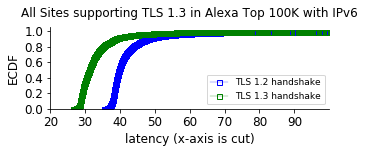

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s = pd.read_csv("C:\\Users\\Admin\\Ordnung\\Studium\\Bachelorarbeit\\2018-bernhard-bachelors-thesis\\data\\CSV Data\\vmott17_v6_100kTls13.csv",';')
yticks = np.arange(0,1.1,0.2)
xticks = np.arange(20,100,10)

tcp = s.loc[s['Protocol'] == 'TCP/TLS1.2']
#print(tcp.count())
tcp13 = s.loc[s['Protocol'] == 'TCP/TLS1.3']
#print(tcp13.count())
x2 = np.sort(tcp['ConnectionEstablishmentTime'])
y2 = np.arange(1, len(x2)+1)/float(len(x2))
x3 = np.sort(tcp13['ConnectionEstablishmentTime'])
y3 = np.arange(1, len(x3)+1)/float(len(x3))

#Plot configuration
fig = plt.figure(figsize=(5,1.5))
plt.rcParams['font.size'] = 12
plt.title('All Sites supporting TLS 1.3 in Alexa Top 100K with IPv6', fontsize=12, y=1.05)
ax = fig.axes[0]
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([20,100])
ax.set_xticks(xticks)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
_ = plt.plot(x2,y2, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
_ = plt.plot(x3,y3, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
_ = plt.xlabel('latency (x-axis is cut)')
_ = plt.ylabel('ECDF')

plt.legend(['TLS 1.2 handshake', 'TLS 1.3 handshake'], fontsize=9, loc='lower right')
#plt.savefig('Plots\\vmott17_v6_100kTls13_allsites.pdf', format='pdf', bbox_inches='tight')
plt.show()

#Plot individual site
gTcp = tcp.loc[tcp['Url'] == 'www.google.com']
gTcp13 = tcp13.loc[tcp13['Url'] == 'www.google.com']

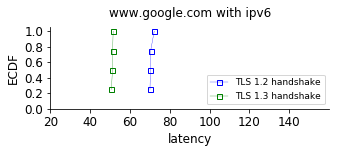

In [29]:
#Only Google Data

gX2 = np.sort(gTcp['ConnectionEstablishmentTime'])
gY2 = np.arange(1, len(gX2)+1)/float(len(gX2))
gX3 = np.sort(gTcp13['ConnectionEstablishmentTime'])
gY3 = np.arange(1, len(gX3)+1)/float(len(gX3))

xticks = np.arange(20,160,20)
fig = plt.figure(figsize=(5,1.5))
plt.rcParams['font.size'] = 12
plt.title('www.google.com with ipv6', fontsize=12, y=1.05)
ax = fig.axes[0]
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([20,160])
ax.set_xticks(xticks)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

_ = plt.plot(gX2,gY2, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
_ = plt.plot(gX3,gY3, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
_ = plt.xlabel('latency')
_ = plt.ylabel('ECDF')

plt.legend(['TLS 1.2 handshake', 'TLS 1.3 handshake'], fontsize=9, loc='lower right')
plt.show()

In [23]:
#This prints the number of unique TCP/TLS 1.2 supporting websites in this dataset
a = pd.unique(tcp['Url'])
ua,uind=np.unique(a,return_inverse=True)
count=np.bincount(uind)
i = 0
for x in count:
    i += 1
print(i)

13663


In [24]:
import datetime
print(datetime.datetime.now())
i = 0
list2 = []
for index, row in tcp.iterrows():
    url = tcp13['Url'] == row['Url']
    timelow = tcp13['TimeOfMeasurement'] - 60 <= row['TimeOfMeasurement']
    timehigh = row['TimeOfMeasurement'] <= tcp13['TimeOfMeasurement'] + 60 #pair measurements that happended in the same minute
    t = tcp13[url & timelow & timehigh]
    t = t.reset_index(drop=True)
    if(t.empty != True):
        list2.append([t.at[0,'Url'], t.at[0,'Ip'], t.at[0,'Port'], (row['ConnectionEstablishmentTime'] - t.at[0,'ConnectionEstablishmentTime'])])
    i = i + 1
    if(i%1000 == 0): #Show me how fast the script is progressing
        print(datetime.datetime.now())
        
dfTls13Tls12 = pd.DataFrame(list2, columns = ['URL','IP', 'PORT', 'ConnDiff'])
print(dfTls13Tls12)

2018-08-13 09:22:18.747528
2018-08-13 09:22:24.999143
2018-08-13 09:22:31.041299
2018-08-13 09:22:37.153245
2018-08-13 09:22:43.185479
2018-08-13 09:22:49.215924
2018-08-13 09:22:55.212390
2018-08-13 09:23:01.274300
2018-08-13 09:23:07.270295
2018-08-13 09:23:13.278086
2018-08-13 09:23:19.325402
2018-08-13 09:23:25.328959
2018-08-13 09:23:31.420220
2018-08-13 09:23:37.690486
2018-08-13 09:23:43.974403
2018-08-13 09:23:50.377672
2018-08-13 09:23:56.415091
2018-08-13 09:24:02.420477
2018-08-13 09:24:08.604443
2018-08-13 09:24:14.667278
2018-08-13 09:24:20.791066
2018-08-13 09:24:26.960029
2018-08-13 09:24:33.061300
2018-08-13 09:24:39.468663
2018-08-13 09:24:45.559233
2018-08-13 09:24:51.720776
2018-08-13 09:24:57.758384
2018-08-13 09:25:03.839078
2018-08-13 09:25:10.063358
2018-08-13 09:25:16.231324
2018-08-13 09:25:22.548858
2018-08-13 09:25:28.688455
2018-08-13 09:25:34.665854
2018-08-13 09:25:40.838962
2018-08-13 09:25:47.015166
2018-08-13 09:25:53.076236
2018-08-13 09:25:59.323887
2

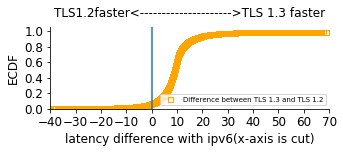

In [28]:
x = np.sort(dfTls13Tls12['ConnDiff'])
y = np.arange(1, len(x)+1)/float(len(x))

yticks = np.arange(0,1.1,0.2)
xticks = np.arange(-40,80,10)
fig = plt.figure(figsize=(5,1.5))
plt.rcParams['font.size'] = 12
plt.title('TLS1.2faster<--------------------->TLS 1.3 faster', fontsize=12, y=1.05)
ax = fig.axes[0]
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([-40,70])
ax.set_xticks(xticks)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
_ = plt.plot(x,y, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
_ = plt.xlabel('latency difference with ipv6(x-axis is cut)')
_ = plt.ylabel('ECDF')
plt.axvline(x=0)

plt.legend(['Difference between TLS 1.3 and TLS 1.2'], fontsize=7, loc='lower right')
#plt.savefig('Plots\\vmott17_v6_100kTls13_allsites_difference.pdf', format='pdf', bbox_inches='tight')
plt.show()